Step 1: Import Necessary Libraries and Load Dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# Load the Building Energy Consumption dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)

# Explore the dataset
print(df)
print(df.head(10))

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0

Step 2: Preprocess the Data

In [9]:
# Check for missing values
print(df.isnull().sum())

# Feature selection and split the data
X = df.iloc[:, :-2].values  # Exclude the last two columns (energy performance)
y = df.iloc[:, -2].values  # Target variable (heating load)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


Step 3: Train Linear Regression Model

In [10]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R-squared Score: {r2_lr}")

Linear Regression - Mean Squared Error: 9.153207645941677
Linear Regression - R-squared Score: 0.9121846294352438


Step 4: Train K-Nearest Neighbors Model

In [11]:
# Train the K-Nearest Neighbors model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors - Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors - R-squared Score: {r2_knn}")

K-Nearest Neighbors - Mean Squared Error: 5.352027999999998
K-Nearest Neighbors - R-squared Score: 0.9486529378254263


Step 5: Visualize Results

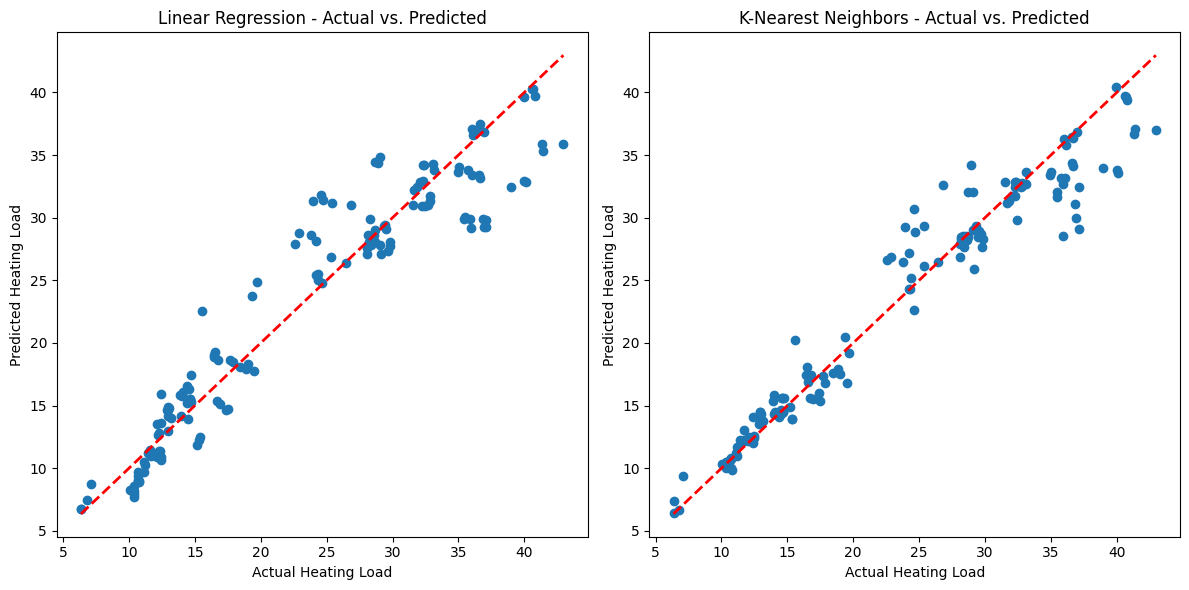

In [12]:
# Visualize Linear Regression Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

# Visualize K-Nearest Neighbors Results
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('K-Nearest Neighbors - Actual vs. Predicted')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

plt.tight_layout()
plt.show()